# Data analysis for predicting whether a mammogram is benign or malignant

For this analysis the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass) was utilized.



# Data Set Information:

Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 
70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years.These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. 

Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal 
a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists. 

Class Distribution: benign: 516; malignant: 445 


# Attribute Information:

6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes) 

1. BI-RADS assessment: 1 to 5 (ordinal, non-predictive!) 
(BI-RADS stands for Breast Imaging Reporting and Data System and was established by the American College of Radiology)
2. Age: patient's age in years (integer) 
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal) 
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal) 
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal) 
6. Severity: benign=0 or malignant=1 (binominal, goal field!) 


# Missing Attribute Values: 
- BI-RADS assessment: 2 
- Age: 5 
- Shape: 31 
- Margin: 48 
- Density: 76 
- Severity: 0 

# Some Useful methods and libraries:

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix
#Visualization
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:59:23.028100. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [2]:
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:31:26.858775. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [22]:
masses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     820 non-null float64
age         820 non-null float64
shape       820 non-null float64
margin      820 non-null float64
density     820 non-null float64
severity    820 non-null int64
dtypes: float64(5), int64(1)
memory usage: 44.8 KB


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:58:00.774339. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:31:46.016260. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
masses_data[masses_data["severity"] ==1]

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
4,5.0,74.0,1.0,5.0,NaN,1
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1
10,5.0,76.0,1.0,4.0,3.0,1
11,3.0,42.0,2.0,1.0,3.0,1
17,4.0,59.0,2.0,1.0,3.0,1
18,4.0,54.0,1.0,1.0,3.0,1


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:39:32.840529. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


youngest with malignant tumor is:

In [12]:
masses_data[masses_data["severity"] ==1].age.min()

28.0

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:40:50.131729. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Oldest with benign tumor

In [13]:
masses_data[masses_data["severity"] ==0].age.max()

86.0

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:41:25.664967. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Maybe this doesn't give us enough information..

Let's check observations with missing data and see if we can only ignore it for our prediction algorithm

In [14]:
masses_data.loc[(masses_data['age'].isnull()) |
              (masses_data['shape'].isnull()) |
              (masses_data['margin'].isnull()) |
              (masses_data['density'].isnull())]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
9,5.0,60.0,NaN,5.0,1.0,1
12,4.0,64.0,1.0,NaN,3.0,0
19,4.0,40.0,1.0,NaN,NaN,0
20,NaN,66.0,NaN,NaN,1.0,1
22,4.0,43.0,1.0,NaN,NaN,0


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:45:14.931394. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
masses_data.dropna(inplace=True)

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:50:54.294586. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


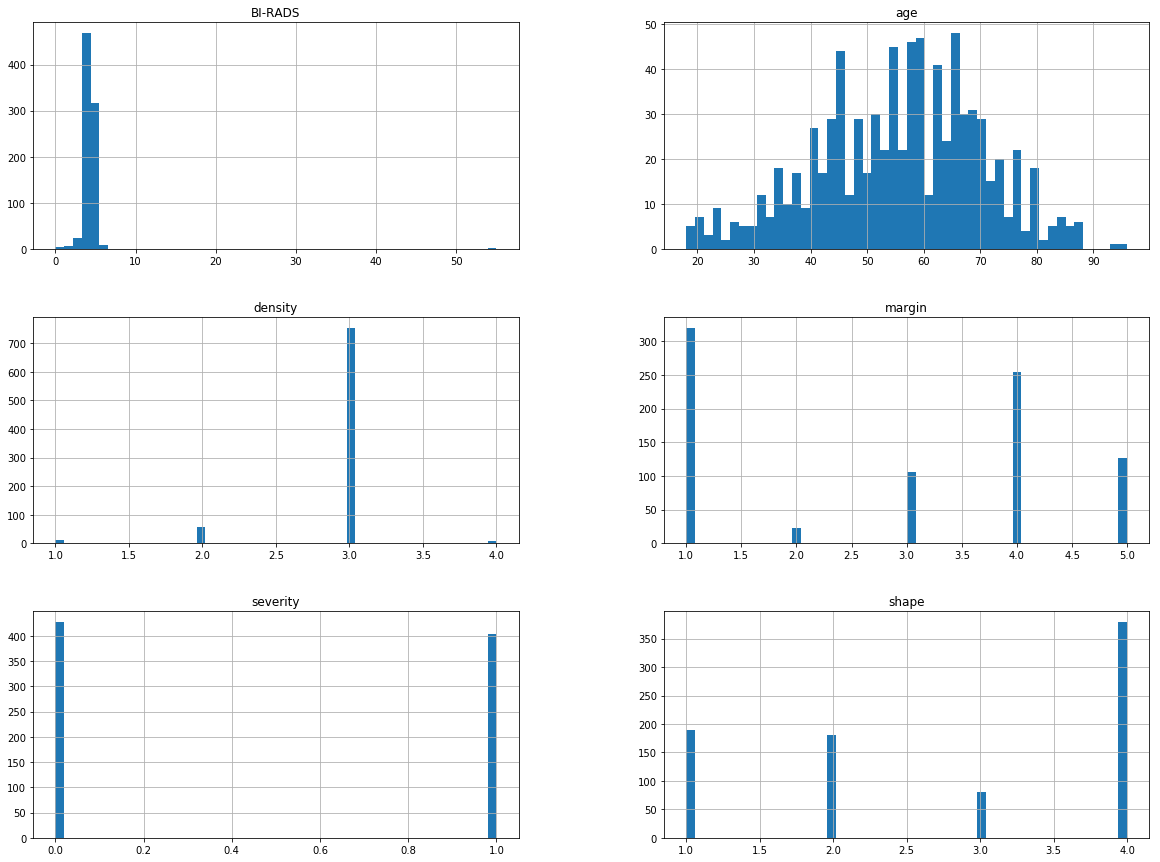

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:52:27.206759. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [19]:
masses_data.hist(bins=50,figsize=(20,15))
plt.show()

Notice that BI-RADS has some values with 55, which is of course an error of our data.

In [20]:
masses_data = masses_data[masses_data["BI-RADS"] <6]

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:55:56.203067. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


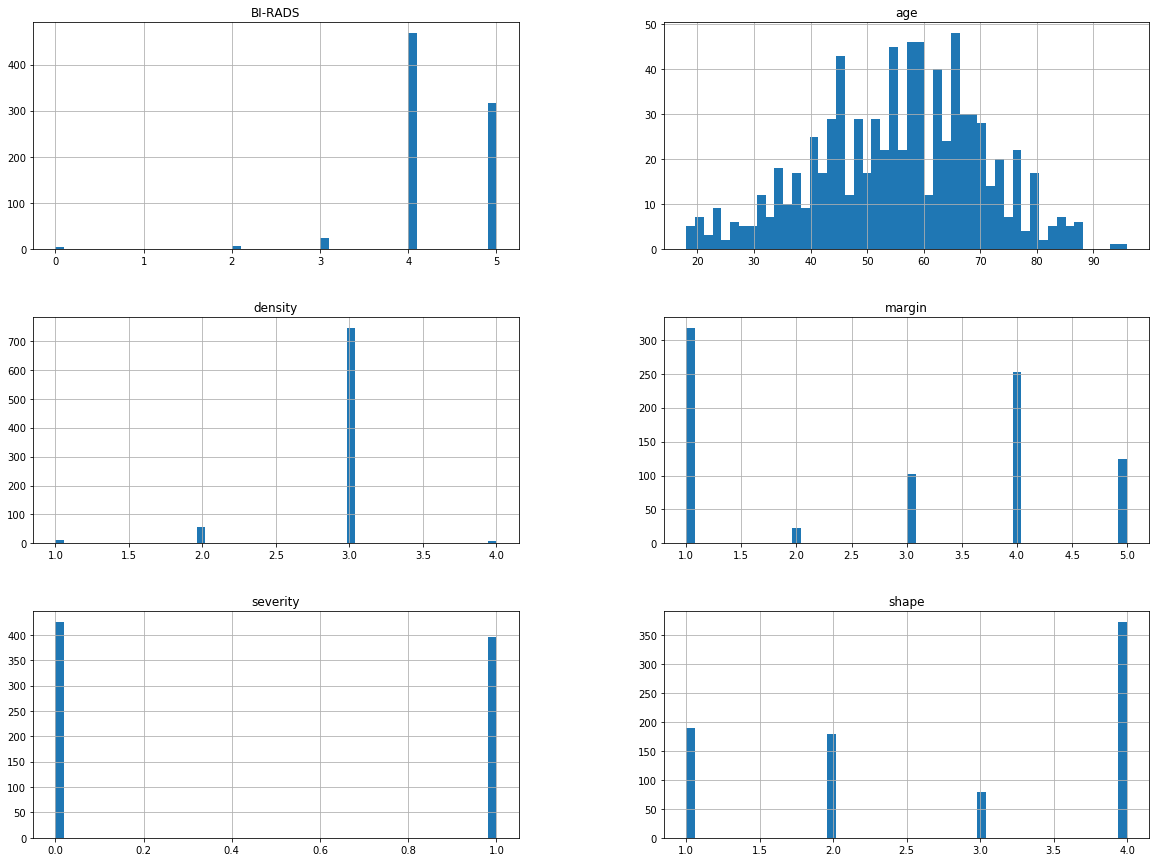

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-05 22:56:05.218742. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
masses_data.hist(bins=50,figsize=(20,15))
plt.show()

In [32]:
byshape = masses_data.groupby("shape").severity.value_counts(normalize = True)
byshape.unstack()

severity,0,1
shape,,
1.0,0.830688,0.169312
2.0,0.826816,0.173184
3.0,0.493671,0.506329
4.0,0.217158,0.782842


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-06 07:34:17.145605. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [27]:
bydensity = masses_data.groupby("density").severity.value_counts(normalize = True)
bydensity

density  severity
1.0      0           0.545455
         1           0.454545
2.0      0           0.690909
         1           0.309091
3.0      0           0.505362
         1           0.494638
4.0      0           0.500000
         1           0.500000
Name: severity, dtype: float64

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-06 07:30:22.818267. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Maybe we can stop taking density into account for our prediction model, however I'll leave it this way by the moment

In [29]:
bymargin = masses_data.groupby("margin").severity.value_counts(normalize = True)
bymargin.unstack()
#This one also seems to have some relation with severity

severity,0,1
margin,,
1.0,0.880503,0.119497
2.0,0.347826,0.652174
3.0,0.382353,0.617647
4.0,0.305556,0.694444
5.0,0.168000,0.832000


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-06 07:33:37.778414. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [66]:
categories = np.linspace(masses_data.age.min(),masses_data.age.max(),4)

masses_data["ageGroup"] = pd.cut(masses_data.age,[25,50,75,100], labels = ["25-50","50-75","75-100"])
byage = masses_data.groupby("ageGroup").severity.value_counts()
byage.unstack()

byagen= masses_data.groupby("ageGroup").severity.value_counts(normalize =True)
byagen.unstack()

severity,0,1
ageGroup,,
25-50,0.743295,0.256705
50-75,0.421166,0.578834
75-100,0.142857,0.857143


C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-06 08:14:39.768855. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


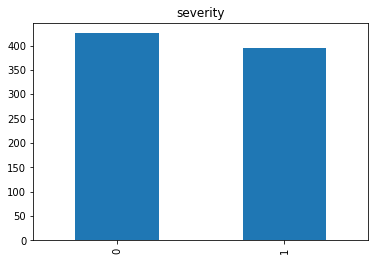

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-06 08:09:48.697915. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [63]:
plt.figure(figsize=(6,4));masses_data.severity.value_counts().plot(kind="bar");plt.title("severity")


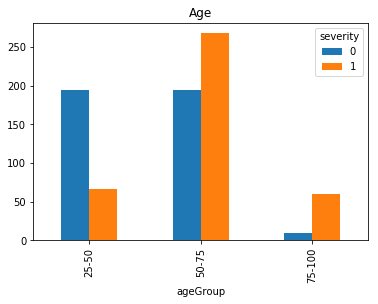

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-06 08:10:10.782501. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [64]:
plt.figure(figsize=(6,4));byage.unstack().plot(kind="bar");plt.title("Age")

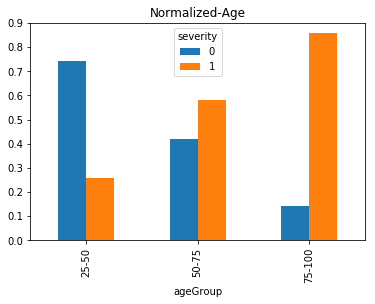

C:\Users\edson.EDSONRIOS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\json\encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2019-05-06 08:10:20.381413. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [65]:
plt.figure(figsize=(6,4));byagen.unstack().plot(kind="bar");plt.title("Normalized-Age")